In [1]:
import numpy as np
import os
from data import select_data_func

In [19]:
folder = '电机连轴端'
cur_path = 'D:/company/data/trueBaogang/2#'
path = os.path.join(cur_path, folder)
train_x, test_x = select_data_func(folder)(path, type=2)

In [20]:
import pandas as pd
df = pd.DataFrame(train_x[0:100])
df

,0,1,2,3,4,5
0,0.67,1.21,1.72,1.64,47.0,3.06
1,1.18,1.72,1.82,1.77,47.0,3.84
2,0.88,1.23,1.19,1.43,57.0,2.75
3,1.11,0.87,1.85,1.54,53.0,2.69
4,0.96,1.64,1.83,1.55,53.0,3.67
...,...,...,...,...,...,...
95,1.09,1.57,1.87,1.71,45.0,3.06
96,1.06,0.91,1.82,1.61,53.0,3.35
97,0.63,0.80,1.07,1.58,47.0,3.84
98,0.97,1.16,1.22,1.55,51.0,3.09


In [21]:
start_time = "2023-05-25 16:50:00"
time_interval = "10T"  # 10分钟的时间间隔
df.index = pd.date_range(start=start_time, periods=df.shape[0], freq=time_interval)
df

,0,1,2,3,4,5
2023-05-25 16:50:00,0.67,1.21,1.72,1.64,47.0,3.06
2023-05-25 17:00:00,1.18,1.72,1.82,1.77,47.0,3.84
2023-05-25 17:10:00,0.88,1.23,1.19,1.43,57.0,2.75
2023-05-25 17:20:00,1.11,0.87,1.85,1.54,53.0,2.69
2023-05-25 17:30:00,0.96,1.64,1.83,1.55,53.0,3.67
...,...,...,...,...,...,...
2023-05-26 08:40:00,1.09,1.57,1.87,1.71,45.0,3.06
2023-05-26 08:50:00,1.06,0.91,1.82,1.61,53.0,3.35
2023-05-26 09:00:00,0.63,0.80,1.07,1.58,47.0,3.84
2023-05-26 09:10:00,0.97,1.16,1.22,1.55,51.0,3.09


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

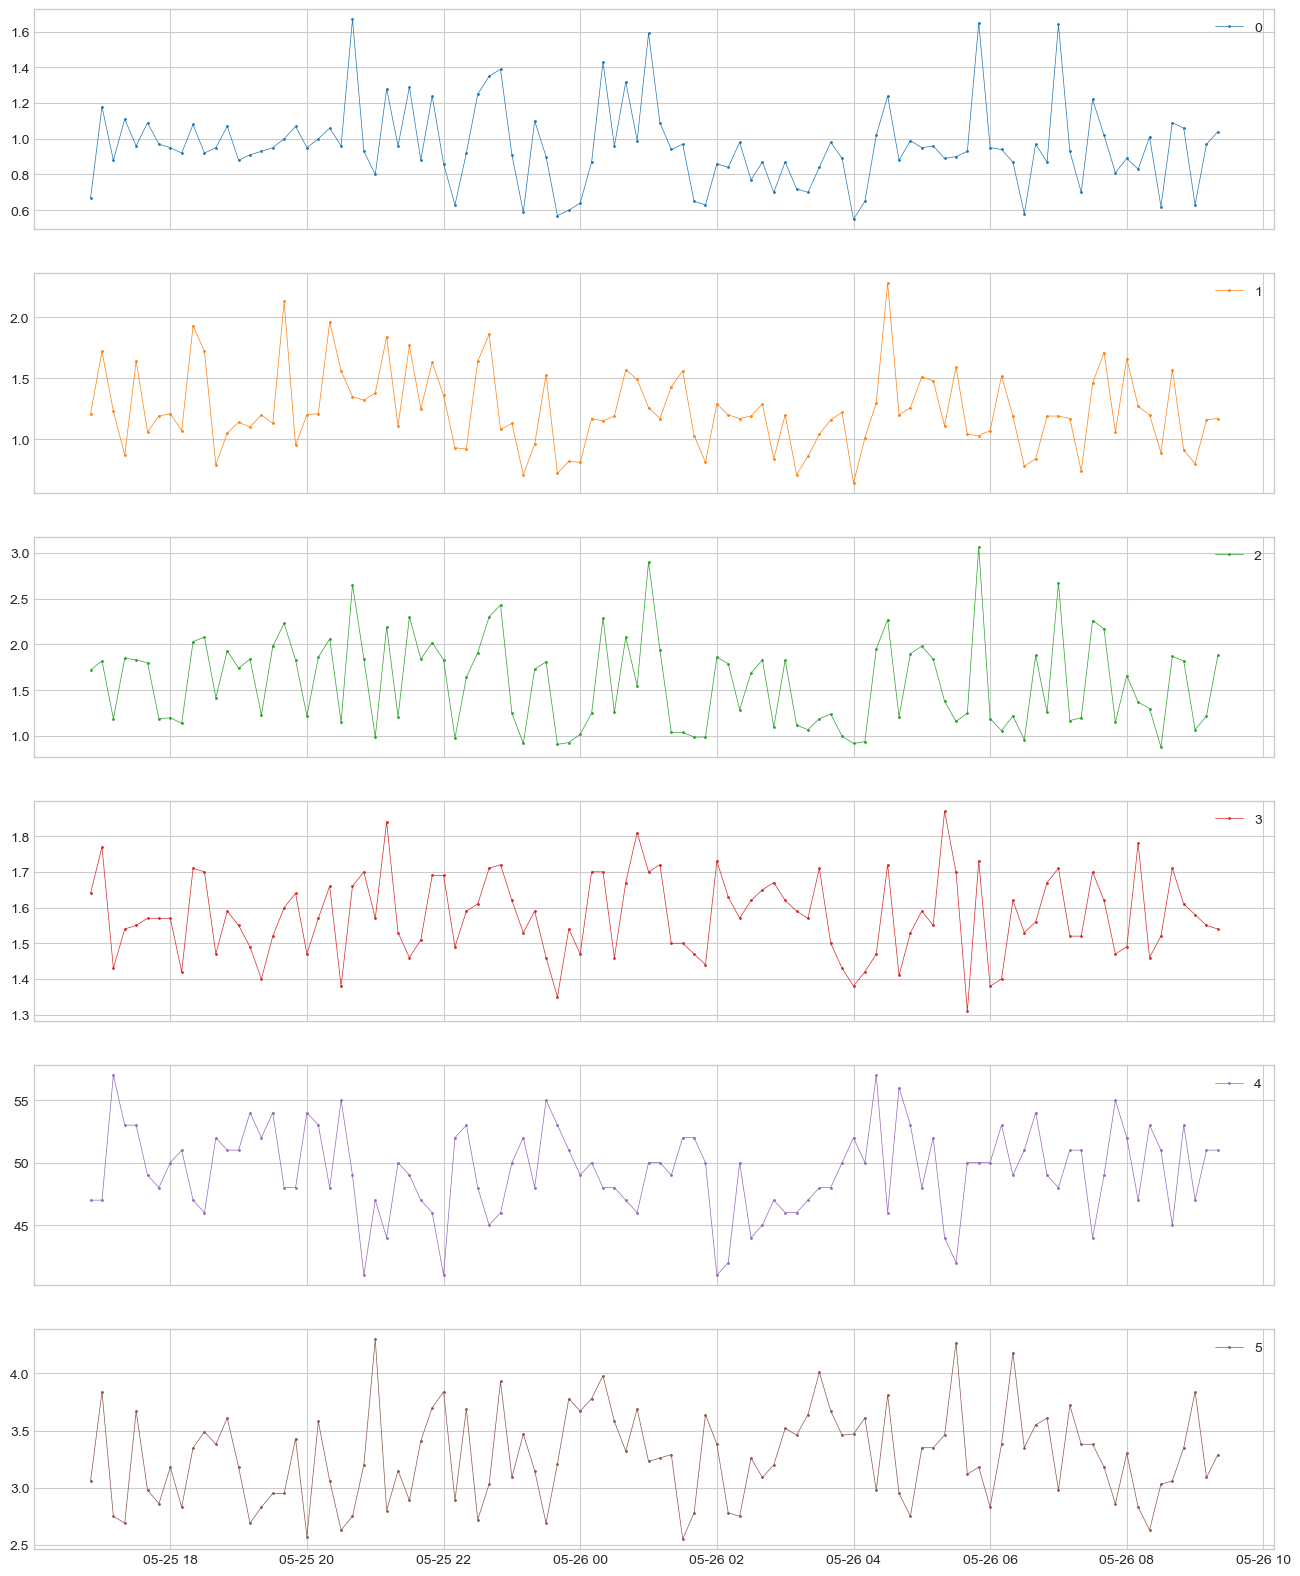

In [22]:
from src.adtk.visualization._visualization import plot
plot(df, figsize=(16, 20))

# 1

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


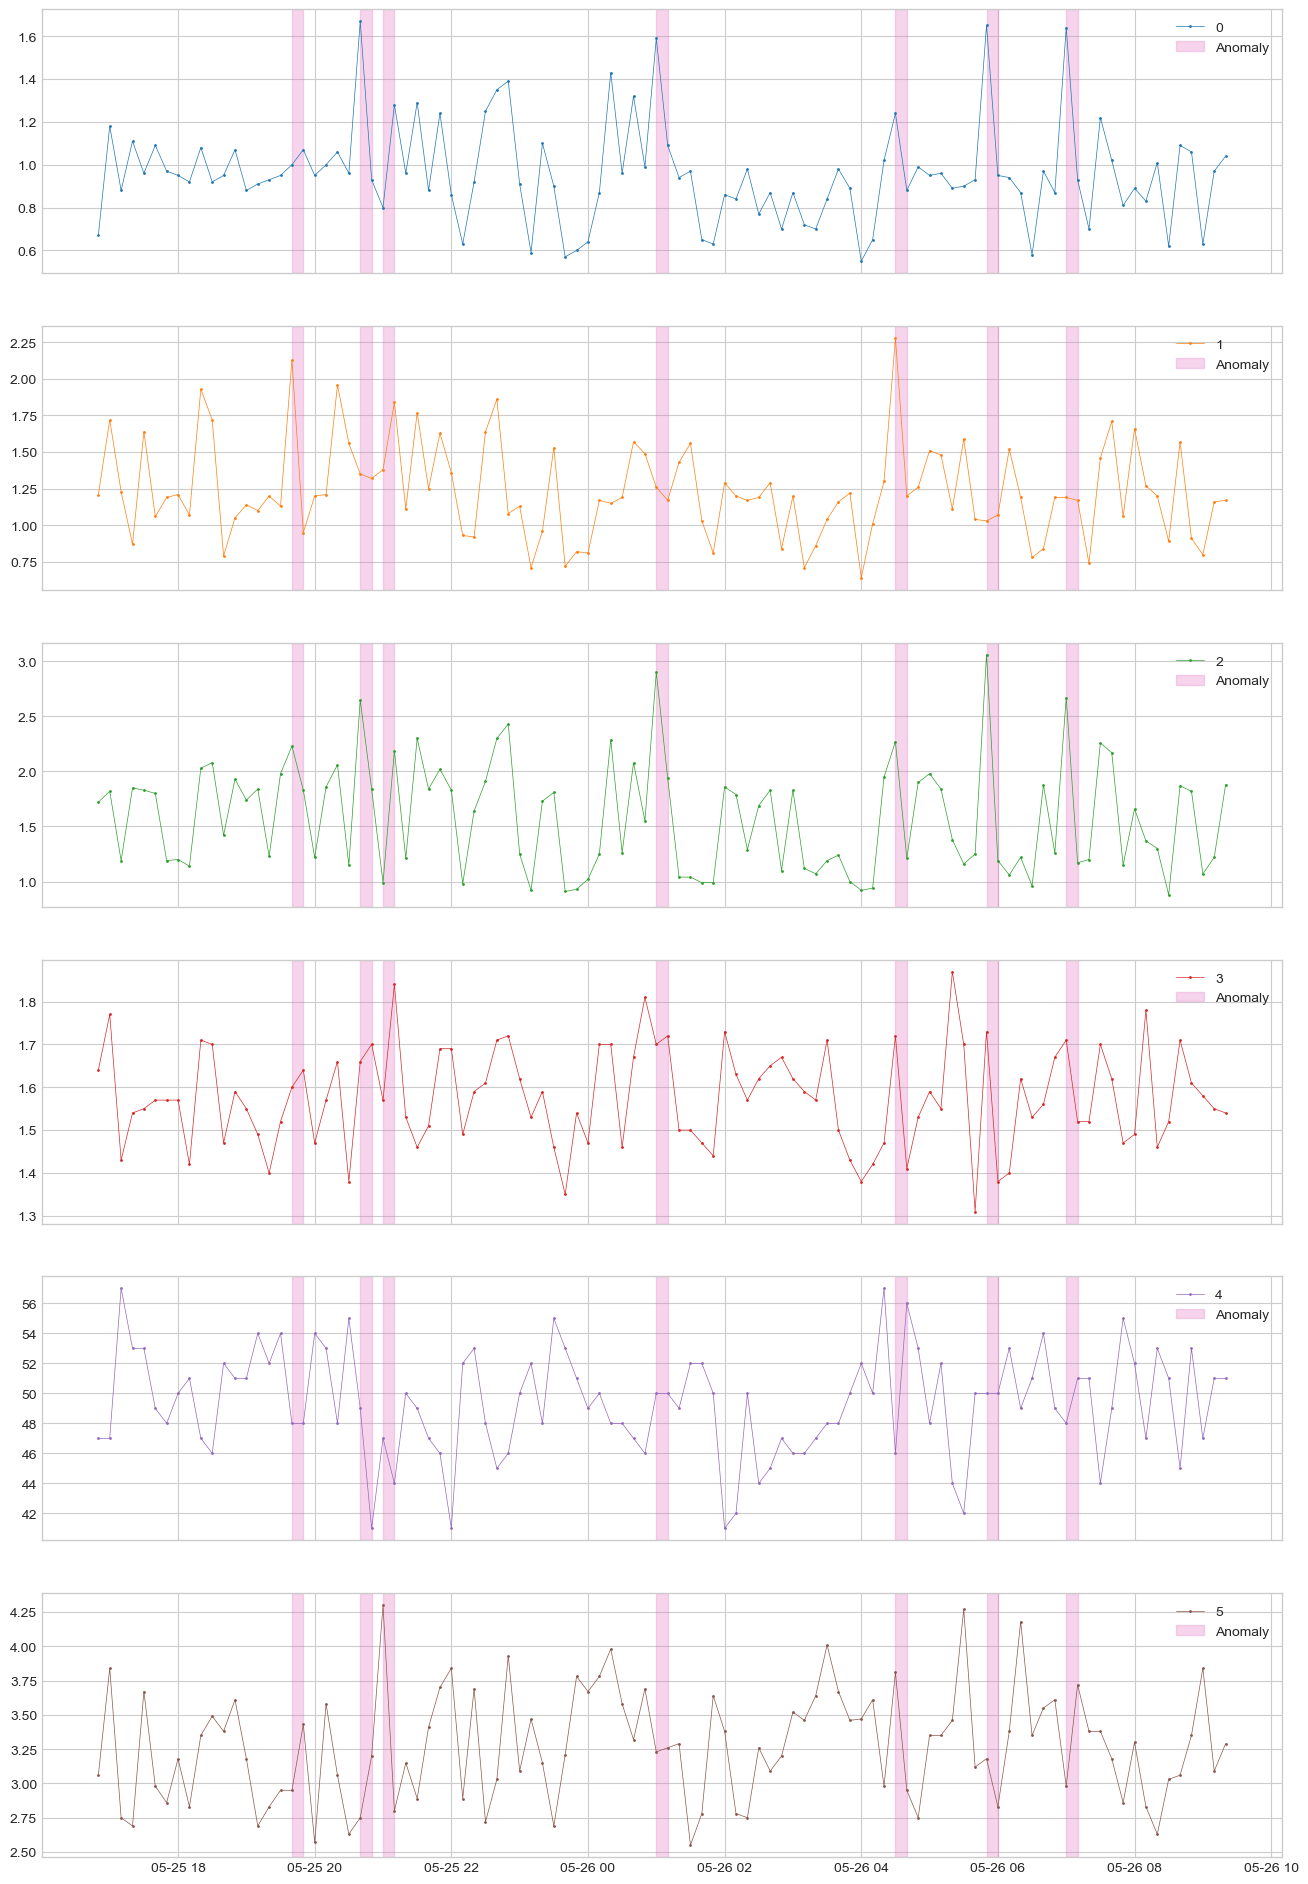

In [10]:
import src.adtk.detector as detector
anomaly = detector.PcaAD(k=1, c=1).fit_detect(df)
plot(df, anomaly);

# 2

In [23]:
df[0]

2023-05-25 16:50:00    0.67
2023-05-25 17:00:00    1.18
2023-05-25 17:10:00    0.88
2023-05-25 17:20:00    1.11
2023-05-25 17:30:00    0.96
                       ... 
2023-05-26 08:40:00    1.09
2023-05-26 08:50:00    1.06
2023-05-26 09:00:00    0.63
2023-05-26 09:10:00    0.97
2023-05-26 09:20:00    1.04
Freq: 10T, Name: 0, Length: 100, dtype: float64

In [24]:
anomaly = {
    "0": detector.QuantileAD(low=0.1).fit_detect(df[0]),
    "1": detector.QuantileAD(high=0.9).fit_detect(df[1]),
    "2": detector.ThresholdAD(low=-1.0, high=0.9).detect(df[2]),
    "3": detector.PersistAD(c=3.0, side='positive').fit_detect(df[3]),
    "4": detector.LevelShiftAD(c=6.0, side='both', window=5).fit_detect(df[4]),
    "5": detector.VolatilityShiftAD(c=6.0, side='positive', window=5).fit_detect(df[5]),
}
anomaly

{'0': 2023-05-25 16:50:00    False
 2023-05-25 17:00:00    False
 2023-05-25 17:10:00    False
 2023-05-25 17:20:00    False
 2023-05-25 17:30:00    False
                        ...  
 2023-05-26 08:40:00    False
 2023-05-26 08:50:00    False
 2023-05-26 09:00:00     True
 2023-05-26 09:10:00    False
 2023-05-26 09:20:00    False
 Freq: 10T, Name: 0, Length: 100, dtype: bool,
 '1': 2023-05-25 16:50:00    False
 2023-05-25 17:00:00     True
 2023-05-25 17:10:00    False
 2023-05-25 17:20:00    False
 2023-05-25 17:30:00    False
                        ...  
 2023-05-26 08:40:00    False
 2023-05-26 08:50:00    False
 2023-05-26 09:00:00    False
 2023-05-26 09:10:00    False
 2023-05-26 09:20:00    False
 Freq: 10T, Name: 1, Length: 100, dtype: bool,
 '2': 2023-05-25 16:50:00    True
 2023-05-25 17:00:00    True
 2023-05-25 17:10:00    True
 2023-05-25 17:20:00    True
 2023-05-25 17:30:00    True
                        ... 
 2023-05-26 08:40:00    True
 2023-05-26 08:50:00    True

In [28]:
plot(df, anomaly);

InvalidIndexError: (slice(None, None, None), slice(0, 3, None))